In [1]:
# Imports

import pandas as pd
import numpy as np
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.tools as tls   
import plotly.graph_objs as go

In [2]:
# Import the data

train = pd.read_csv('../data/train_cleaned_v2.csv', encoding='utf-8')

In [3]:
train = train[['tweet_id','tweet_cleaned','sentiment']]

In [4]:
train.columns = ['tweet_id', 'tweet', 'sentiment']

In [5]:
train.head()

tweet_id                                              tweet  sentiment
0      1701   sxswnui  sxsw  apple defining language of tou...          1
1      1851  learning ab google doodles  all doodles should...          1
2      2689  one of the most in your face ex  of stealing t...          2
3      4525  this iphone  sxsw app would b pretty awesome i...          0
4      3604  line outside the apple store in austin waiting...          1

In [6]:
train.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [7]:
train.dropna(inplace=True)

In [8]:
train.isnull().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [9]:
train.shape

(7273, 3)

In [10]:
# Delete ItemID

#train.drop('ItemID', axis=1, inplace=True)

In [11]:
targetsentiment = train.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
#temp.style.background_gradient(cmap='Purples')
targetsentiment

sentiment  tweet
1          1   4310
2          2   2382
0          0    456
3          3    125

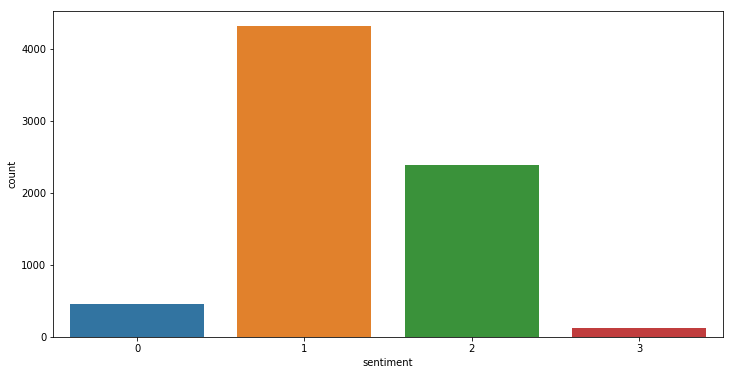

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

In [13]:
fig = go.Figure(go.Funnelarea(
    text =targetsentiment.sentiment,
    values = targetsentiment.tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [14]:
train.head()

tweet_id                                              tweet  sentiment
0      1701   sxswnui  sxsw  apple defining language of tou...          1
1      1851  learning ab google doodles  all doodles should...          1
2      2689  one of the most in your face ex  of stealing t...          2
3      4525  this iphone  sxsw app would b pretty awesome i...          0
4      3604  line outside the apple store in austin waiting...          1

In [15]:
import re
from string import punctuation

In [84]:
train['tweet'].head()

0     sxswnui  sxsw  apple defining language of tou...
1    learning ab google doodles  all doodles should...
2    one of the most in your face ex  of stealing t...
3    this iphone  sxsw app would b pretty awesome i...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [17]:
all_sentiments1 = '\n'.join(train['tweet'])

In [83]:
# all_sentiments1

In [19]:


def performCleansingForSentimentalAnalysisWithStopWords(completeText):
#     print('##### Get Tokens in Lower Case #######')
#     #Get tokens in lower case
#     lowercasetokens = getUniqueTokens(completeText.lower())
#     unique_lowercase_tokens = len(set(lowercasetokens))
#     print('Lowercase Unique Tokens are ' + format(unique_lowercase_tokens))
#     print('##### Applying  stemming #######')
#     #Applying the stemming
#     unique_lowercase_tokens_stemmed= stemData(lowercasetokens)
#     len_unique_lowercase_tokens_stemmed = len(unique_lowercase_tokens_stemmed)
#     print('Lowercase Unique Tokens after steming  ' + format(len_unique_lowercase_tokens_stemmed))
#     print('##### Applying stop words + removing Hashtags + mentions + Links + Short Links +  #######')
 #   hashtags = find_hashtags(lowercompleteText)
 #    mentions = find_mentions(lowercompleteText)
 #   links = find_links(lowercompleteText)
#    numbers = find_numbers(lowercompleteText)
#    emojis = find_emojis(lowercompleteText)
#    punctuations = list(punctuation)
#     unique_lowercase_tokens_stemmed_without_stopwords = removeCustomStopWords(lowercompleteText,hashtags,mentions,links,numbers,emojis,punctuations)
#     return unique_lowercase_tokens_stemmed_without_stopwords
    lowercompleteText = completeText.lower()
    import re
    hastag_pat = r'#[0-9a-z_]+'
    mentions_pat = r'\@[0-9a-z]+'
    number_pat = r'-?\d+\.?\d+|-?\d+'
    links_pat= r'http://\S+|https://\S+'
    punctuations_pat= r'[.!?\\-]'
    #short_links_pat =
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    def remove_hashtags(tweet):
        return re.sub(hastag_pat, '', tweet)
    def remove_mentions(tweet):
        return re.sub(mentions_pat, '', tweet)
    def remove_numbers(tweet):
        return re.sub(number_pat, '',tweet)
    def remove_links(tweet):
        return re.sub(links_pat, '', tweet)
    def remove_emojis(tweet):
        return re.sub(emoji_pattern, '', tweet)
    def remove_shortLinks(tweet):
        return re.sub(short_links_pat, '', tweet)
    def remove_punctuations(tweet):
        return re.sub(punctuations_pat, '', tweet)
    def find_hashtags(tweet):
        return re.findall(hastag_pat, tweet)
    def find_mentions(tweet):
        return re.findall(mentions_pat, tweet, flags=re.I)
    def find_links(tweet):
        return re.findall(links_pat, tweet, flags=re.I)
    def find_numbers(tweet):
        return re.findall(number_pat, tweet)
    def find_emojis(tweet):
        return re.findall(emoji_pattern, tweet)
    
          
    lowercompleteText = remove_hashtags(lowercompleteText)
    lowercompleteText = remove_mentions(lowercompleteText)
    lowercompleteText = remove_numbers(lowercompleteText)
    lowercompleteText = remove_links(lowercompleteText)
    lowercompleteText = remove_emojis(lowercompleteText)
    lowercompleteText = remove_punctuations(lowercompleteText)
  #  lowercompleteText = getstemData(lowercompleteText)
    return  lowercompleteText

In [20]:
# train['tweet'] = train['tweet'].apply(lambda x:performCleansingForSentimentalAnalysisWithStopWords(x))

In [82]:
train['tweet'].head()

0     sxswnui  sxsw  apple defining language of tou...
1    learning ab google doodles  all doodles should...
2    one of the most in your face ex  of stealing t...
3    this iphone  sxsw app would b pretty awesome i...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [24]:
train['sentiment'].value_counts()

1    4310
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [25]:
all_sentiments = '\n'.join(train['tweet'])

In [110]:
from nltk.corpus import stopwords
import nltk

from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]
train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tweet']]

train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])


In [111]:
train.head()

tweet_id                                              tweet  sentiment  \
0      1701   sxswnui  sxsw  apple defining language of tou...          1   
1      1851  learning ab google doodles  all doodles should...          1   
2      2689  one of the most in your face ex  of stealing t...          2   
3      4525  this iphone  sxsw app would b pretty awesome i...          0   
4      3604  line outside the apple store in austin waiting...          1   

                                      tokenized_text  
0  [sxswnui, sxsw, apple, defining, language, tou...  
1  [learning, ab, google, doodles, doodles, light...  
2  [one, face, ex, stealing, show, yrs, rt, sxsw,...  
3  [iphone, sxsw, app, would, b, pretty, awesome,...  
4  [line, outside, apple, store, austin, waiting,...

In [112]:
from collections import Counter

In [113]:
top= Counter([item for sublist in train['tokenized_text'] for item in sublist])
temp = pd.DataFrame(top.most_common(22))
temp.columns = ['Common_words','count']

In [114]:
temp

Common_words  count
0          sxsw   7669
1        google   2085
2         apple   1876
3          ipad   1291
4        iphone   1214
5         store   1202
6         ipad2   1116
7           new    862
8            rt    792
9        austin    792
10          app    662
11      circles    547
12       social    528
13       launch    516
14          pop    487
15        today    465
16      android    443
17      network    372
18          via    340
19         line    325
20         free    322
21          get    316

In [116]:
temp_nsxsw = temp[temp.Common_words!='sxsw']
temp_nsxsw = temp_nsxsw[temp_nsxsw.Common_words!='rt']

temp_nsxsw

Common_words  count
1        google   2085
2         apple   1876
3          ipad   1291
4        iphone   1214
5         store   1202
6         ipad2   1116
7           new    862
9        austin    792
10          app    662
11      circles    547
12       social    528
13       launch    516
14          pop    487
15        today    465
16      android    443
17      network    372
18          via    340
19         line    325
20         free    322
21          get    316

In [31]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image

In [117]:
fig = px.bar(temp_nsxsw, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [118]:
fig = px.treemap(temp_nsxsw, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [34]:
Negative_sent = train[train['sentiment']==0]
Neutral_sent = train[train['sentiment']==1]
Positive_sent = train[train['sentiment']==2]
Canttell_sent = train[train['sentiment']==3]

                     

In [35]:
Negative_sent.head()

tweet_id                                              tweet  sentiment  \
3       4525  this iphone  sxsw app would b pretty awesome i...          0   
24       634     i have a 3g iphone  after 3 hrs tweeting at...          0   
34      1178  so i went the whole day w out my laptopjust us...          0   
50      5058       google lost its way by caring too much fo...          0   
63      2435  i composed a tweet so acerbic and cynical abou...          0   

                                       tokenized_text  
3   [iphone, sxsw, app, would, b, pretty, awesome,...  
24  [3g, iphone, 3, hrs, tweeting, rise, austin, d...  
34  [went, whole, day, w, laptopjust, used, ipad, ...  
50  [google, lost, way, caring, much, business, vs...  
63  [composed, tweet, acerbic, cynical, ipad, user...

In [36]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['tokenized_text'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(22))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Greens')

In [120]:
temp_negative = temp_negative[temp_negative.Common_words!='sxsw']
temp_negative = temp_negative[temp_negative.Common_words!='rt']

temp_negative

Common_words  count
1        iphone    127
2        google    119
3          ipad    115
4         apple     99
5         ipad2     57
6           app     50
7         store     38
9          like     35
10          new     31
11      circles     29
12       design     26
13       austin     25
14       social     24
15         apps     23
16        would     21
17         need     21
18       people     21
19      android     20

In [129]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree of Most Common Words (Negative)')
fig.show()

In [137]:
fig = px.bar(temp_negative.sort_values('count'), x="count", y="Common_words", title='Most Commmon positive Words (Negative)', orientation='h', 
             width=700, height=700)
fig.show()

In [123]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['tokenized_text'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(22))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [124]:
temp_positive = temp_positive[temp_positive.Common_words!='sxsw']
temp_positive = temp_positive[temp_positive.Common_words!='rt']

temp_positive

Common_words  count
1         apple    740
2        google    575
3          ipad    513
4         ipad2    486
5         store    427
6        iphone    423
7           app    323
9           new    297
10       austin    232
11      android    167
12          pop    162
13       launch    129
14          get    122
15          one    120
16        great    109
17        party    105
18         free    104
19          via    104
20       social    102
21         time    102

In [130]:
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree of Most Common Words (Positive)')
fig.show()

In [135]:
fig = px.bar(temp_positive.sort_values('count'), x="count", y="Common_words", title='Most Commmon positive Words (Positive)', orientation='h', 
             width=700, height=700)
fig.show()

In [126]:
#MosT common neutral words
top = Counter([item for sublist in Neutral_sent['tokenized_text'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(22))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Greens')

In [127]:
temp_neutral = temp_neutral[temp_neutral.Common_words!='sxsw']
temp_neutral = temp_neutral[temp_neutral.Common_words!='rt']

temp_neutral

Common_words  count
1        google   1352
2         apple   1008
3         store    720
4          ipad    641
5        iphone    640
6         ipad2    551
7           new    530
8        austin    522
10      circles    409
11       social    397
12       launch    368
13        today    354
14          pop    304
15      network    287
16          app    285
17      android    251
18          via    224
19       called    222
20         free    216
21         line    206

In [140]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree of Most Common Words (Neutral)')
fig.show()

In [139]:
fig = px.bar(temp_neutral.sort_values('count'), x="count", y="Common_words", title='Most Commmon positive Words (Neutral)', orientation='h', 
             width=700, height=700)
fig.show()

In [42]:
#MosT common neutral words
top = Counter([item for sublist in Canttell_sent['tokenized_text'] for item in sublist])
temp_canttell = pd.DataFrame(top.most_common(20))
temp_canttell.columns = ['Common_words','count']
temp_canttell.style.background_gradient(cmap='Greens')

In [43]:
fig = px.bar(temp_canttell, x="count", y="Common_words", title='Most Commmon canttell Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [44]:
raw_text = [word for word_list in train['tokenized_text'] for word in word_list]

In [45]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['tokenized_text']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['tokenized_text']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [46]:
Unique_Positive= words_unique(2, 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


In [47]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

In [48]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

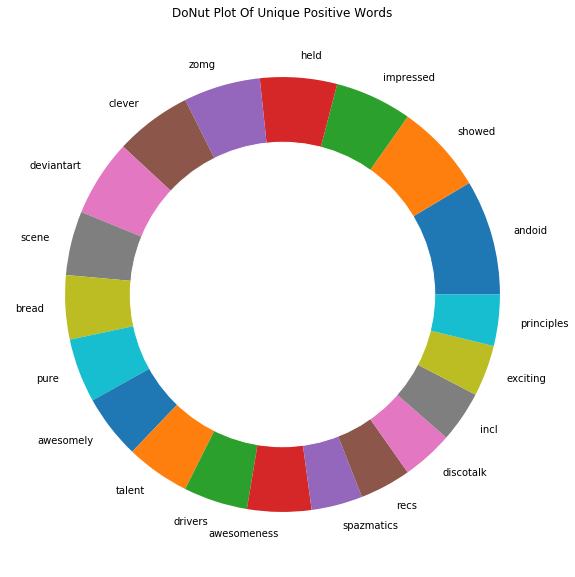

In [49]:
#from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [50]:
Unique_Neutral= words_unique(1, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='pink')

The top 20 unique words in neutral Tweets are:


In [51]:
fig = px.treemap(Unique_Neutral, path=['words'], values='count',title='Tree Of Unique neutral Words')
fig.show()

In [52]:
Unique_Negative= words_unique(0, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_Negative.style.background_gradient(cmap='Greens')

The top 20 unique words in neutral Tweets are:


In [53]:
fig = px.treemap(Unique_Negative, path=['words'], values='count',title='Tree Of Unique negative Words')
fig.show()

In [54]:
Unique_canttell= words_unique(3, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_canttell.style.background_gradient(cmap='Greens')

The top 20 unique words in neutral Tweets are:


In [55]:
fig = px.treemap(Unique_canttell, path=['words'], values='count',title='Tree Of Unique canttell Words')
fig.show()

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Aniket/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
from nltk.corpus import stopwords
import nltk

from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]

# tokenize
train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tweet']]


In [60]:
train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

#train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in punc])

#train['tweet'] = train['tweet'].apply(lambda row: [word for word in row if word not in punc])

In [61]:
train['tokenized_text']

0       [sxswnui, sxsw, apple, defining, language, tou...
1       [learning, ab, google, doodles, doodles, light...
2       [one, face, ex, stealing, show, yrs, rt, sxsw,...
3       [iphone, sxsw, app, would, b, pretty, awesome,...
4       [line, outside, apple, store, austin, waiting,...
5       [technews, one, lone, dude, awaits, ipad2, app...
6       [sxsw, tips, prince, npr, videos, toy, shoppin...
7       [nu, user, rt, new, ubersocial, iphone, app, s...
8                [free, sxsw, sampler, itunes, freemusic]
9       [think, might, go, weekend, without, seeing, i...
10      [official, sxsw, app, sxsw, go, android, iphon...
11                [official, buying, ipad, sxsw, elevate]
12      [giving, away, ipad2, x, boxes, books, sxsw, t...
13      [officially, sxsw, come, grill, mention, us, w...
14      [companies, watch, sxsw, trade, show, floor, a...
15      [google, marissa, mayer, future, location, aug...
16      [dl, calyp, app, get, calyp, casa, sxsw, free,...
17      [well,

In [62]:
stemmer = PorterStemmer()

train['tokenized_text'] = train['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
train['tokenized_text'] = train['tokenized_text'].apply(lambda x: ' '.join(x))


In [63]:
train['tokenized_text']

0       sxswnui sxsw appl defin languag touch differ d...
1       learn ab googl doodl doodl light funnyinnov ex...
2       one face ex steal show yr rt sxsw appl school ...
3       iphon sxsw app would b pretti awesom didnt cra...
4        line outsid appl store austin wait new ipad sxsw
5       technew one lone dude await ipad2 appl sxsw st...
6       sxsw tip princ npr video toy shop zuckerberg s...
7       nu user rt new ubersoci iphon app store includ...
8                          free sxsw sampler itun freemus
9       think might go weekend without see ipad case t...
10             offici sxsw app sxsw go android iphon ipad
11                              offici buy ipad sxsw elev
12               give away ipad2 x box book sxsw techenvi
13      offici sxsw come grill mention us w zazzlsxsw ...
14      compani watch sxsw trade show floor app featur...
15      googl marissa mayer futur locat augment realit...
16      dl calyp app get calyp casa sxsw free mobil ap...
17      well y

In [64]:
all_words ='\n'.join([str(text) for text in train['tokenized_text']])
all_words
#all_words = '\n'.join(train['tokenized_text'])

'sxswnui sxsw appl defin languag touch differ dialect becom smaller\nlearn ab googl doodl doodl light funnyinnov except signific occas googledoodl sxsw\none face ex steal show yr rt sxsw appl school mkt expert\niphon sxsw app would b pretti awesom didnt crash everi 10min extend brows fuckit illmakeitwork\nline outsid appl store austin wait new ipad sxsw\ntechnew one lone dude await ipad2 appl sxsw store tech news appl ipad 2 sxsw tablet tech\nsxsw tip princ npr video toy shop zuckerberg sxsw ipad\nnu user rt new ubersoci iphon app store includ uberguid sxsw sponsor mashabl\nfree sxsw sampler itun freemus\nthink might go weekend without see ipad case twice sxsw\noffici sxsw app sxsw go android iphon ipad\noffici buy ipad sxsw elev\ngive away ipad2 x box book sxsw techenvi\noffici sxsw come grill mention us w zazzlsxsw get make iphon case\ncompani watch sxsw trade show floor app featur hardwar ipad iphon\ngoogl marissa mayer futur locat augment realiti contextu discoveri make smartphon s

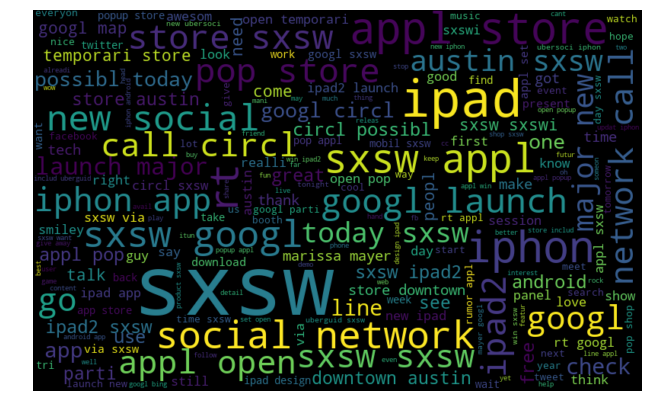

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# all the tweets

# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot wordcloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [66]:
#tok = TreebankWordTokenizer()

In [67]:
# Find unique tokens

#unique_tokens = len(set(tok.tokenize(all_sentiments)))

#print(f'Unique unprocessed tokens - {unique_tokens}')

In [68]:
# Unique lower cased tokens

#unique_lower_case = [t.lower() for t in tok.tokenize(all_sentiments)]
#unique_lc_count = len(set(unique_lower_case))

#print(f'Unique lower case unprocessed tokens - {unique_lc_count}')

In [69]:
#ps = PorterStemmer()

In [70]:
# Unique lower cased stemmed tokens

#unique_lc_stemmed = [ps.stem(t) for t in unique_lower_case]
#unique_lc_stem_count = len(set(unique_lc_stemmed))

#print(f'Unique lower case stemmed tokens - {unique_lc_stem_count}')

In [71]:

# Load stop words

#stw = stopwords.words('english')

In [72]:
# Unique lower cased stemmed w/o stop wordstokens

#unique_lc_stem_wo_stpwrds = [t for t in unique_lc_stemmed if t not in stw]
#unique_lc_stem_wo_stw_count = len(set(unique_lc_stem_wo_stpwrds))

#print(f'Unique lower case stemmed tokens without stop words - {unique_lc_stem_wo_stw_count}')

In [73]:
# Create a word cloud

#wc = WordCloud(stopwords=stw, background_color='white', max_words=500).generate(all_sentiments.lower())

In [74]:
#%matplotlib inline
#plt.figure(figsize=(15, 10))
#plt.clf()
#plt.imshow(wc)
#plt.axis('off')
#plt.show()